# Introduction

----

The idea behind this project was to create a transparent scoring system that could be used to rank active players, track progress, and make it easy to periodically recognize achievements. This version is somewhat of a rough draft; hopefully it provides a framework that can be adapted and improved over time based on community feedback.  The code is written in Python and utilizes data pulled from the speedrun.com API.  This document starts with some boring details about the scoring system, then provides a kind of proof of concept.  If anyone actually makes it through to the end, let me know what you think (Is this something that the community would be interested in?  Do you have any suggestions for improving the scoring system? etc.).

# Scoring System

----

This scoring system was inspired by progressive marginal income taxes.  Let me explain...  The whole idea behind these tax systems is that an individual's income is partitioned into brackets that have a progressively higher tax rate.  Similarly, each run is partitioned into brackets where the points scored per millisecond increases progressively.  The brackets are defined by standards, benchmarks, and medals.  Thus, for a run slower than the standard time, an improvement of 100ms would gain $x$ points; but for a run somewhere between standard and benchmark times, an improvement of 100ms might gain $2x$ points.  This should become clearer as I explain the scoring for each bracket.  Scoring is slightly different between IL and RTA runs, given that there are no standards or benchmarks for RTA runs.

#### Eligibility

> * Only runs from players with speedrun.com user accounts are considered in the scoring (no guests)
> * Of these, only verified runs with video proof are considered (for now)

#### Definitions:

> **IL** - individual level (time trial, in-game timer)
> 
> **RTA** - real-time attack (championship mode, external timer)
>
> **Benchmark** - For a given IL course, the benchmark is defined based on the 3rd place time, x'yy"zzz, as:  
> * x'yy"999 (for 3 Lap, Reverse)  
> * x'yy"999 (for 1 Lap where zzz $\geq$ 500)  
> * x'yy"499 (for 1 Lap where zzz < 500)
> 
> **Standard** - For a given IL course, the standard is defined as:  
> * benchmark time + 1 sec (3 Lap, Reverse)  
> * benchmark time + 0.5 sec (1 Lap)

## Run Brackets (IL)

There are four scoring brackets for IL runs: Base, Standard, Benchmark, and Medal.  In each bracket, 1 Lap times receive half as many points as 3 Lap and Reverse times.

#### Base Bracket (IL)

For the Base Score, any run faster than the standard time receives 1 point.  All other runs receive a score between 0 and 1 depending on how close they are to achieving a standard time.

\begin{equation}
    \text{Base Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_{ij}~~ \text{does not exist}\\
        \hfil \lambda \hfil & \text{if}~~ \text{t}_{ij} \leq \text{standard}_i\\
        \lambda \left(\frac{\text{slowest}_{ij} - \text{t}_{ij}}{\text{slowest}_{ij} - \text{standard}_{ij}}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 1 \hfil & \text{for}~~ \text{3 Lap, Reverse}\\
        \hfil \frac{1}{2} \hfil & \text{for}~~ \text{1 Lap}
    \end{cases}
\end{equation}

#### Standard Bracket (IL)

For the Standard Score, any run faster than the benchmark time receives 2 points.  Runs slower than the benchmark time but faster than the standard time receive between 0 and 2 points depending on how close they are to achieving a benchmark time.  All other runs receive 0 points for this bracket.

\begin{equation}
    \text{Standard Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_i > \text{standard}_i\\
        \hfil \lambda \hfil & \text{if}~~ \text{t}_i \leq \text{benchmark}_i\\
        \lambda \left(\frac{\text{standard}_i - \text{t}_i}{\text{standard}_i - \text{benchmark}_i}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 2 \hfil & \text{for}~~ \text{3 Lap, Reverse}\\
        \hfil 1 \hfil & \text{for}~~ \text{1 Lap}
    \end{cases}
\end{equation}

#### Benchmark Bracket (IL)

For the Benchmark Score, 1st-3rd place runs receive 3 points.  Runs slower than 3rd place but faster than the benchmark time receive between 0 and 3 points depending on how close they are to medalling.  All other runs receive 0 points for this bracket.

\begin{equation}
    \text{Benchmark Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_i > \text{benchmark}_i\\
        \hfil \lambda \hfil & \text{if}~~ \text{t}_i \leq \text{3rd place}_i\\
        \lambda \left(\frac{\text{benchmark}_i - \text{t}_i}{\text{benchmark}_i - \text{3rd place}_i}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 3 \hfil & \text{for}~~ \text{3 Lap, Reverse}\\
        \hfil \frac{3}{2} \hfil & \text{for}~~ \text{1 Lap}
    \end{cases}
\end{equation}

#### Medal Bracket (IL)

For the Medal Score, 1st place receives 4 points.  2nd and 3rd place receive between 0 and 4 points depending on how close they are to 1st place relative to how far ahead of 4th place they are.

\begin{equation}
    \text{Medal Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_i > \text{3rd place}_i\\
        \lambda \left(\frac{\text{4th place}_i - \text{t}_i}{\text{4th place}_i - \text{1st place}_i}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 4 \hfil & \text{for}~~ \text{3 Lap, Reverse}\\
        \hfil 2 \hfil & \text{for}~~ \text{1 Lap}
    \end{cases}
\end{equation}

#### Run Score (IL)

The total score for each run is the sum of the Base, Standard, Benchmark, and Medal scores.  A world record run receives a total of 10 points.

\begin{equation}
    \text{IL Run Score} = \text{Base Score} + \text{Standard Score} + \text{Benchmark Score} + \text{Medal Score}
\end{equation}

## Run Brackets (RTA)

Since RTA runs do not have benchmark or standard times, there are only two brackets: time-based and medal-based.

#### Championship Bracket (RTA)

The Championship Score is based on how close each run is to the 1st place time.  Normal, Hard, Expert, and Reverse Championships receive between 0 and 2 points; All Championships runs receive between 0 and 8 points.

\begin{equation}
    \text{Championship Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_{i}~~ \text{does not exist}\\
        \lambda \left(\frac{\text{slowest}_{i} - \text{t}_{i}}{\text{slowest}_{i} - \text{1st place}_{i}}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 8 \hfil & \text{for}~~ \text{All Championships}\\
        \hfil 2 \hfil & \text{for}~~ \text{Normal, Hard, Expert, Reverse}
    \end{cases}
\end{equation}

#### Medal Bracket (RTA)

The RTA Medal Score is calculated in the same manner as the IL Medal Score.  The only difference being the maximum possible points for each Championship (Normal, Hard, Expert, and Reverse = 3 points; All Championships = 12 points).

\begin{equation}
    \text{Medal Score} = 
    \begin{cases}
        \hfil 0 \hfil & \text{if}~~ \text{t}_i > \text{3rd place}_i\\
        \lambda \left(\frac{\text{4th place}_i - \text{t}_i}{\text{4th place}_i - \text{1st place}_i}\right) & \text{otherwise}
    \end{cases}
\end{equation}

\begin{equation}
    \lambda = 
    \begin{cases}
        \hfil 12 \hfil & \text{for}~~ \text{All Championships}\\
        \hfil 3 \hfil & \text{for}~~ \text{Normal, Hard, Expert, Reverse}
    \end{cases}
\end{equation}

#### Run Score (RTA)

The total score for each run is the sum of the Championship and Medal scores.  A world record run receives a total of 5 points for Normal, Hard, Expert, or Reverse Championship runs and 20 points for an All Championships run.

\begin{equation}
    \text{RTA Run Score} = \text{Championship Score} + \text{Medal Score}
\end{equation}

## Total Score (Player)

A player's total score is the sum of all IL and RTA run scores, scaled so that the maximum possible score is 100 points.  The total possible points for IL runs is 200, whereas RTA is 40.  This means that IL runs account for 80% of a player's total score and RTA runs account for 20%.  These weights could be changed in the future depending on feedback.  For now, they seem to provide pretty good results.

# Demonstration

-----

Now that the technical stuff is out of the way.  Here is where I'll show some of the ways this scoring system can be utilized.

## Rankings

Let's start with rankings. The table below shows the most recent official rankings (2021 Q4):

| Rank | Player |
| ---- | ------ |
| 1 | Shibbypod |
| 2 | doctorfeesh |
| 3 | Game |
| 4 | MDK1 |
| 5 | MyOhMyPancakes |
| 6 | MetalHead |
| 7 | AS_Money |
| 8 | Illudude |
| 9 | meauxdal |
| 10 | andypanther |

For comparison, I ran the scripts based on leaderboard data as of January 1st, 2022. The scores produce a Top 10 that is identical to the official rankings... only now we get a little more information about the top players.  For example, Game is the only top player to not submit any eligible RTA runs, relying exclusively on phenomenal IL run scores.  MDK1 is now 4th based on incredible progress over the quarter (dSCORE). In fact, the only other top player to see a score improvement over the past quarter was doctorfeesh.  Negative dSCORES can occur for a variety of reasons, like losing a medal or when benchmarks change.  Also, notice that there are two ranking columns.  Scores are calculated based on all eligible runs, including currently inactive players. The "Overall Rank" shows how a given player stacks up against the historical field.  The "Current Rank" includes only players who've submitted an eligible run at any time in the past two years.  MyOhMyPancakes is currently ranked 5th, but has an overall rank of 6th because 5th belongs to mo_moe (inactive).

In [1]:
from waveracepy import *
date = '2022-01-01'
demonstrate.top10()

,Current Rank,Total Score,IL Score,RTA Score,dSCORE,Overall Rank
Shibbypod,1.0,93.64,92.36,100.00,-0.07,1.0
doctorfeesh,2.0,82.60,84.96,70.80,0.04,2.0
Game,3.0,46.53,55.84,0.00,-5.86,3.0
MDK1,4.0,38.90,44.01,13.32,20.41,4.0
MyOhMyPancakes,5.0,31.02,29.16,40.30,-2.76,6.0
MetalHead,6.0,30.55,29.89,33.88,-2.11,7.0
AS_Money,7.0,25.94,25.01,30.60,-2.28,8.0
Illudude,8.0,25.55,29.36,6.45,-0.93,9.0
meauxdal,9.0,23.79,25.44,15.55,-1.53,10.0
andypanther,10.0,19.62,18.73,24.07,-0.56,11.0


The fun thing about this is that all eligible players receive a score.  Below is a plot showing the Top 10 and honorable mentions from the 2021 Q4 rankings against the rest of the field.  At a certain point, the top players really separate from the pack.

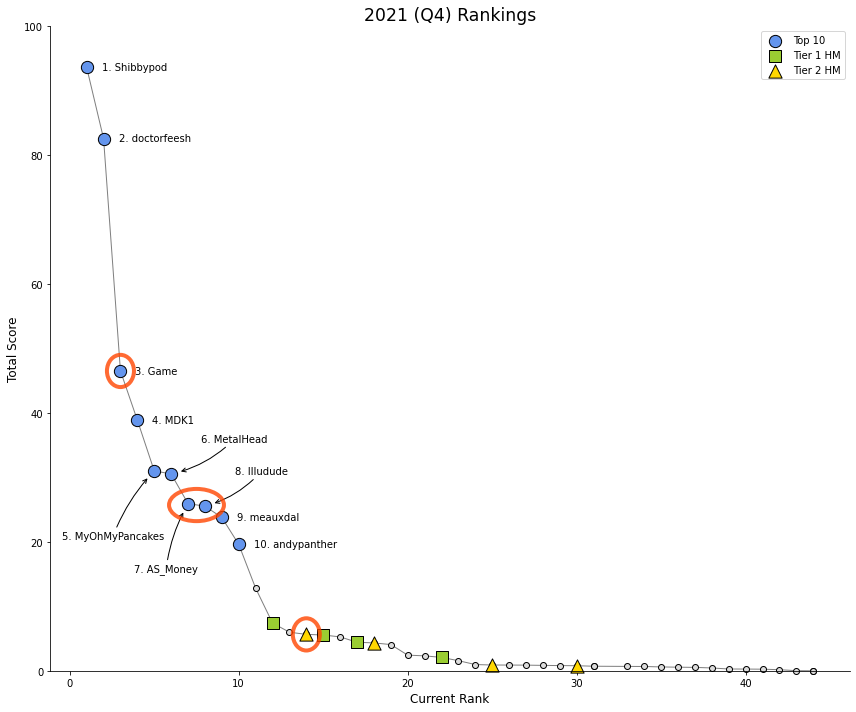

In [2]:
demonstrate.plot()

The red circles are meant to show how different strategies compare within this system.  The circles highlight 4 players with remarkably different styles: Game (3rd), AS_Money (7th), Illudude (8th), and VR747_CHALON_Type_a8 (14th).  AS_Money and Illudude are separated by only 0.39 points.  Looking at their tallysheets (below), AS_Money achieved their score by having nearly a full IL sheet better than standard times (PB 1 Lap is missing because there is no video) and a solid RTA score.  Illudude has only 15/29 eligible runs, but these are almost all top tier times.  Despite fewer submissions, Illudude has more benchmark times than AS_Money and a 7-0 edge on medals. This demonstrates that there are effectively multiple ways to get into the Top 10.  On the other hand, we have VR747_CHALON_Type_a8, who has the 4th best RTA score while having 0 IL submissions.  This gets them near the top of the pack but isn't nearly enough to crack the Top 10 (a perfect RTA score would just barely beat out andypanther for 10th with 20 points).  On the other hand, we have Game who is ranked 3rd while completely neglecting RTA runs.

In [3]:
demonstrate.compare_styles()

,Sheet,IL Sheet,RTA Sheet,Standards,Benchmarks,Medals
AS_Money,28,23,5,22,10,0
Illudude,15,14,1,13,11,7
VR747_CHALON_Type_a8,5,0,5,0,0,0


## Awards

Another advantage of the scoring system is that it can be used to quickly identify awards for players.  This can be used to recognize top players (overall, new), improving players (overall, course-specific), or whatever else we can come up with. Here are some examples...

*Notes:* 
* *Obviously top player is redundant given the rankings.*
* *Hayate1017 isn't exactly new, but welcome back!*

In [4]:
# Top Player = Shibbypod
awards.top_players(date)

,,
Player,Current Rank,Total Score
Shibbypod,1.0,93.64
doctorfeesh,2.0,82.60
Game,3.0,46.53


In [5]:
# Top Newcomer = Hayate1017
awards.top_newcomers(date)

,,,
Player,Total Score,Current Rank,dSCORE
Hayate1017,2.32,21.0,NaN
touhu_dnb,0.79,30.0,NaN
Sysynct,0.71,31.0,NaN


In [6]:
# Most Improved Player = MDK1
awards.most_improved_players(date)

,,,
Player,dSCORE,Total Score,Current Rank
MDK1,20.41,38.90,4.0
VR747_CHALON_Type_a8,4.86,5.65,14.0
RyanWarner,1.31,7.41,12.0


In [7]:
# Best Runs
awards.most_improved_courses(date)

,,,,,,
Category,Player,Level,dTIME,Time,Place,Link
3 Lap,MDK1,Southern Island,-0.805,73.965,2,https://youtu.be/p1tTkvX3Pj8
1 Lap,RyanWarner,Sunny Beach,-0.072,20.475,16,https://youtu.be/lWjmQErjsHE
Reverse,MDK1,Sunny Beach,-2.205,65.939,4,https://youtu.be/1o8C4AQOL2U
RTA,MDK1,Championship Normal,-34.000,564.000,3,https://youtu.be/7u37I2mJWGw


## Achievements

Finally, we can use this data to keep track of achievements.  Here is a list of all new players who submitted their first time in 2021 Q4:

In [8]:
# First Submission Achievement
achievements.newcomers(date)

,
New Player,Submissions
backpain4,1
GetLow,1
Hayate1017,1
irukan,1
PasiKienzi,5
Sysynct,1
touhu_dnb,1


Here is a list of players that submitted PBs in 2021 Q4:

In [9]:
# PB Achievement
achievements.pbs(date)

,
Player,New PBs
MDK1,8
AdomHaMez,3
doctorfeesh,2
RyanWarner,2
dosufura,1
VR747_CHALON_Type_a8,1


Here are the players who have a complete, full sheet (IL, RTA):

*Note: AS_Money also has a complete full sheet but PB 1 Lap is missing a video*

In [10]:
# Complete Sheet Achievement
achievements.complete_sheet(date)

""
Complete Sheet
andypanther
doctorfeesh
MetalHead
MyOhMyPancakes
Shibbypod


And progressively more difficult achievements, like beating standard times for every course (3 players) or benchmark times for every course (2 players) or even medalling in every course (only Shibbypod).  I would love to see what other kinds of achievements we could come up with.

In [11]:
# All Standards Achievement
achievements.all_standards(date)

""
All Standards
doctorfeesh
Game
Shibbypod


In [12]:
# All Benchmarks Achievement
achievements.all_benchmarks(date)

""
All Benchmarks
doctorfeesh
Shibbypod


In [13]:
# All Medals Achievement
achievements.all_medals(date)

""
All Medals
Shibbypod
